 ## Latar Belakang 
 
 The New York City Taxi and Limousine Commission (TLC) adalah badan pemerintah yang bertanggung jawab atas regulasi dan lisensi taksi,mengatur taxi, kendaraan sewaan, mobil komuter, dan kendaraan paratransit di kota New York. Peran utama dari New York City TLC adalah mengatur operasi dan pelayanan transportasi umum yang dilakukan oleh taksi dan kendaraan sewa di wilayah New York City.

Stackholder : Manajer New York City TLC. 


## Permasalahan

Dari data yang ada, Manajer ingin memahami pola permintaan  taksi di New York City.Proyek Analisis ini diharapkan dapat insight yang dapat meningkatkan layanan taksi dan meningkatkan profit perusahaan. 

##  Tahapan Analisis 
1. Data Understanding
2. Data Preparation
3. Data Analysis
4. Insights and Recommendations

## Data Understanding

Dataset yang digunakan adalah data yang dikumpulkan oleh TLC untuk setiap trip yang diselesaikan oleh para pengemudi yang berlisensi. Data dicatat oleh Technology Service Providers (TSP)dan satu baris pada dataset mewakili 1 trip.

1. **VendorID**: merupakan kode yang mengindikasikan penyedia LPEP (Long Passenger Endorsement Program) yang memberikan catatan perjalanan.
   - 1 = Creative Mobile Technologies, LLC.
   - 2 = VeriFone Inc.
2. **lpep_pickup_datetime**: merupakan tanggal dan waktu saat meter taksi diaktifkan (mulai perjalanan).

3. **lpep_dropoff_datetime**: merupakan tanggal dan waktu saat meter taksi dinonaktifkan (akhir perjalanan).

4. **store_and_fwd_flag**: merupakan tanda yang menunjukkan apakah catatan perjalanan dipegang dalam memori kendaraan sebelum dikirim ke vendor, yang disebut "store and forward," karena kendaraan tidak memiliki koneksi ke server. Nilainya dapat menjadi 'Y' atau 'N'.
   - Y = perjalanan yang disimpan dan diteruskan
   - N = bukan perjalanan yang disimpan dan diteruskan

5. **RatecodeID**: merupakan kode tarif akhir yang berlaku pada akhir perjalanan.
   - 1 = Tarif standar
   - 2 = JFK (John F. Kennedy International Airport)
   - 3 = Newark (Newark Liberty International Airport)
   - 4 = Nassau atau Westchester
   - 5 = Tarif yang ditawar
   - 6 = Perjalanan kelompok

6. **PULocationID**: merupakan kode zona taksi TLC (Taxi and Limousine Commission) di mana meter taksi diaktifkan.

7. **DOLocationID**: merupakan kode zona taksi TLC di mana meter taksi dinonaktifkan.

8. **passenger_count**: merupakan jumlah penumpang dalam kendaraan. Nilai ini dimasukkan oleh pengemudi.

9. **trip_distance**: merupakan jarak perjalanan yang dilaporkan oleh taksi dalam mil.

10. **fare_amount**: merupakan biaya perjalanan yang dihitung berdasarkan waktu dan jarak yang diukur oleh meter taksi.

11. **extra**: merupakan biaya tambahan dan ekstra seperti biaya puncak atau biaya malam yang saat ini mencakup biaya tambahan $0,50 dan $1.

12. **mta_tax**: merupakan pajak MTA (Metropolitan Transportation Authority) sebesar $0,50 yang secara otomatis diaktifkan berdasarkan tarif yang diukur oleh meter.

13. **tip_amount**: merupakan jumlah tip (tambahan) yang secara otomatis diisi untuk tip kartu kredit. Tips tunai tidak termasuk.

14. **tolls_amount**: merupakan jumlah total tol yang dibayarkan dalam perjalanan.

15. **ehail_fee**: merupakan biaya e-hail (memesan taksi melalui aplikasi ponsel) yang mungkin ada.

16. **improvement_surcharge**: merupakan biaya perbaikan sebesar $0,30 yang dikenakan pada perjalanan yang dihail (dipesan) melalui penjemputan dengan bendera. Biaya perbaikan ini mulai dikenakan pada tahun 2015.

17. **total_amount**: merupakan jumlah total yang dibebankan kepada penumpang, tidak termasuk tips tunai.

18. **payment_type**: merupakan kode numerik yang menunjukkan cara pembayaran penumpang untuk perjalanan.
   - 1 = Kartu kredit
   - 2 = Tunai
   - 3 = Gratis
   - 4 = Bermasalah
   - 5 = Tidak diketahui
   - 6 = Perjalanan dibatalkan

19. **trip_type**: merupakan kode yang menunjukkan apakah perjalan ini street hail (diambil langsung di jalan) atau dispatch (dipesan melalui aplikasi atau pusat pengiriman) yang secara otomatis ditentukan berdasarkan tarif yang diukur oleh meter, tetapi dapat diubah oleh pengemudi.
   - 1 = Street-hail
   - 2 = Dispatch

20. **congestion_surcharge**: merupakan biaya kemacetan yang mungkin dikenakan pada perjalanan taksi untuk mengatasi masalah lalu lintas. Nilainya bisa bervariasi.


##  Data Preparation 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import scipy
warnings.filterwarnings("ignore")

In [3]:
tlc = pd.read_csv('NYC TLC Trip Record.csv')
tlc

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


In [4]:
tlc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [5]:
display(tlc.describe(), tlc.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [6]:
tlc.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.863028,0.343820,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.117160,1.372913,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.549735,61.244314,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.429901,76.761311,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.825431,1.269904,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.588340,0.385819,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22


In [7]:
#menghilangkan data duplicate
tlc  = tlc.drop_duplicates()
tlc.duplicated().sum()

0

In [8]:
# melihat missing value 
tlc.isna().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

In [9]:
# Menghapus kolom yang memiliki missing value 
tlc.dropna(subset=['trip_type'],inplace=True)
tlc.drop('ehail_fee', inplace=True, axis=1)
tlc.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64

In [10]:
# melihat data unik di tiap kolom
pd.set_option('display.max_colwidth', 0)
item = []
for col in tlc.columns :
    item.append( [col, tlc[col].nunique(), tlc[col].unique()])

tabeltlc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=item)
tabeltlc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,62665,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,62602,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

In [11]:
#melihat dan menghapus anomali disetiap kolom
tlc['VendorID'].value_counts()

VendorID
2    54672
1    9205 
Name: count, dtype: int64

In [12]:
tlc['payment_type'].value_counts()

payment_type
1.0    40676
2.0    22632
3.0    472  
4.0    95   
5.0    2    
Name: count, dtype: int64

In [13]:
tlc['trip_type'].value_counts()

trip_type
1.0    62476
2.0    1401 
Name: count, dtype: int64

In [14]:
tlc[['lpep_pickup_datetime']].sort_values(by="lpep_pickup_datetime")

,lpep_pickup_datetime
17874,2009-01-01 20:21:27
298,2022-12-09 14:10:49
318,2022-12-09 14:55:42
24,2023-01-01 00:01:31
44,2023-01-01 00:04:25
...,...
63844,2023-01-31 23:45:10
63876,2023-01-31 23:53:41
63858,2023-01-31 23:56:16
63872,2023-01-31 23:58:23


In [15]:
#menghapus anomali pada kolom 'lpep_pickup_datetime'
tlc.drop(index=[17874, 298, 318, 25100 ])

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [16]:
tlc.drop(index=[17874, 298, 318])

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,2,2023-01-31 23:09:22,2023-01-31 23:17:21,N,5.0,130,205,1.0,2.75,15.0,0.0,0.0,2.00,0.0,0.3,17.30,1.0,2.0,0.00
63883,2,2023-01-31 23:06:18,2023-01-31 23:17:03,N,1.0,65,181,1.0,2.44,13.5,1.0,0.5,3.20,0.0,1.0,19.20,1.0,1.0,0.00
63884,2,2023-01-31 23:17:03,2023-01-31 23:23:04,N,1.0,244,116,1.0,1.40,9.3,1.0,0.5,2.36,0.0,1.0,14.16,1.0,1.0,0.00
63885,2,2023-01-31 23:29:18,2023-01-31 23:38:50,N,1.0,74,238,1.0,2.47,13.5,1.0,0.5,3.75,0.0,1.0,22.50,1.0,1.0,2.75


In [17]:
tlc['passenger_count'].value_counts()

passenger_count
1.0    54289
2.0    5096 
5.0    1772 
6.0    1054 
3.0    958  
4.0    364  
0.0    336  
7.0    4    
9.0    2    
8.0    2    
Name: count, dtype: int64

In [18]:
#menghapus jumlah penumpang 0
tlc = tlc[tlc['passenger_count'] > 0]
tlc['passenger_count'].value_counts()

passenger_count
1.0    54289
2.0    5096 
5.0    1772 
6.0    1054 
3.0    958  
4.0    364  
7.0    4    
9.0    2    
8.0    2    
Name: count, dtype: int64

In [19]:
#mengurutkan kolom trip distance untuk melihat jarak jauh dan terdekat
display(tlc.sort_values(by='trip_distance',ascending=False).head(),\
        tlc.sort_values(by='trip_distance',ascending=True).head())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
33373,2,2023-01-17 18:40:38,2023-01-17 19:04:45,N,5.0,82,236,1.0,1571.97,29.97,0.0,0.0,3.04,6.55,1.0,43.31,1.0,1.0,2.75
7322,2,2023-01-05 09:00:03,2023-01-05 15:18:38,N,5.0,134,134,1.0,66.18,15.00,0.0,0.0,0.00,0.00,1.0,18.75,2.0,1.0,2.75
43013,2,2023-01-22 10:39:49,2023-01-22 11:48:18,N,1.0,82,265,1.0,57.09,205.30,0.0,0.5,0.00,0.00,1.0,206.80,2.0,1.0,0.00
48770,2,2023-01-24 22:56:13,2023-01-25 19:43:58,N,5.0,179,264,4.0,53.72,0.01,0.0,0.0,0.00,0.00,1.0,3.76,2.0,1.0,2.75
30501,2,2023-01-16 11:21:23,2023-01-16 12:07:33,N,5.0,175,265,1.0,48.70,140.00,0.0,0.0,0.10,0.00,1.0,141.10,1.0,2.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
26550,2,2023-01-14 01:35:03,2023-01-14 01:35:07,N,5.0,14,14,1.0,0.0,18.0,0.0,0.0,0.00,0.0,1.0,19.00,1.0,2.0,0.00
32913,1,2023-01-17 16:57:48,2023-01-17 17:24:33,N,1.0,65,14,1.0,0.0,29.5,0.0,1.5,0.00,0.0,1.0,31.00,1.0,1.0,0.00
59462,2,2023-01-29 19:54:14,2023-01-29 19:54:18,N,5.0,76,76,1.0,0.0,9.0,0.0,0.0,0.00,0.0,0.3,9.30,1.0,2.0,0.00
59463,2,2023-01-29 20:57:34,2023-01-29 21:07:31,N,1.0,75,239,1.0,0.0,9.3,1.0,0.5,2.91,0.0,1.0,17.46,1.0,1.0,2.75
13261,2,2023-01-07 19:46:17,2023-01-07 19:46:19,N,5.0,265,264,1.0,0.0,10.0,0.0,0.0,0.00,0.0,1.0,11.00,1.0,2.0,0.00


In [20]:
# menghapus baris 33373 karena dalam kurun waktu 18.40 sampai 19.04 menempuh jarak 1571. terlihat tidak mungkin. bisa jadi ini kesalah
# dan menghapus jarak 0
tlc = tlc.drop(tlc[tlc['trip_distance'] == 1571.97].index)
tlc = tlc.drop(tlc[tlc['trip_distance'] == 0].index)
display(tlc.sort_values(by='trip_distance',ascending=False).head(),\
        tlc.sort_values(by='trip_distance',ascending=True).head())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
7322,2,2023-01-05 09:00:03,2023-01-05 15:18:38,N,5.0,134,134,1.0,66.18,15.00,0.0,0.0,0.0,0.0,1.0,18.75,2.0,1.0,2.75
43013,2,2023-01-22 10:39:49,2023-01-22 11:48:18,N,1.0,82,265,1.0,57.09,205.30,0.0,0.5,0.0,0.0,1.0,206.80,2.0,1.0,0.00
48770,2,2023-01-24 22:56:13,2023-01-25 19:43:58,N,5.0,179,264,4.0,53.72,0.01,0.0,0.0,0.0,0.0,1.0,3.76,2.0,1.0,2.75
30501,2,2023-01-16 11:21:23,2023-01-16 12:07:33,N,5.0,175,265,1.0,48.70,140.00,0.0,0.0,0.1,0.0,1.0,141.10,1.0,2.0,0.00
62314,2,2023-01-31 11:26:06,2023-01-31 12:19:14,N,4.0,130,265,1.0,48.19,258.50,0.0,0.5,0.0,0.0,1.0,260.00,2.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
34226,2,2023-01-18 09:46:05,2023-01-18 09:46:09,N,1.0,74,74,1.0,0.01,3.0,0.0,0.5,0.00,0.0,1.0,4.50,2.0,1.0,0.0
18845,2,2023-01-10 17:14:01,2023-01-10 17:14:04,N,5.0,56,264,1.0,0.01,40.0,0.0,0.0,0.00,0.0,1.0,41.00,1.0,2.0,0.0
39342,2,2023-01-20 14:04:57,2023-01-20 14:05:06,N,1.0,74,74,1.0,0.01,3.0,0.0,0.5,0.00,0.0,1.0,4.50,4.0,1.0,0.0
39341,2,2023-01-20 14:04:57,2023-01-20 14:05:06,N,1.0,74,74,1.0,0.01,-3.0,0.0,-0.5,0.00,0.0,-1.0,-4.50,4.0,1.0,0.0
54304,2,2023-01-27 09:26:06,2023-01-27 09:27:19,N,1.0,43,43,2.0,0.01,3.0,0.0,0.5,0.12,0.0,1.0,4.62,1.0,1.0,0.0


In [21]:
tlc['fare_amount'].value_counts()

fare_amount
8.60      3096
10.00     3093
9.30      2940
7.90      2828
10.70     2762
          ... 
24.60     1   
20.07     1   
8.49      1   
440.00    1   
92.60     1   
Name: count, Length: 375, dtype: int64

In [22]:
# menghapus fare amount kurang atau = 0
tlc = tlc[tlc['fare_amount'] > 0]
tlc['fare_amount'].value_counts()

fare_amount
8.60      3096
10.00     3093
9.30      2940
7.90      2828
10.70     2762
          ... 
24.60     1   
20.07     1   
8.49      1   
440.00    1   
92.60     1   
Name: count, Length: 355, dtype: int64

In [23]:
tlc['extra'].value_counts()

extra
0.00     33579
2.50     11848
1.00     10815
2.75     1523 
5.00     803  
0.50     591  
5.25     470  
7.50     280  
3.75     220  
6.00     79   
3.25     51   
5.50     1    
12.50    1    
Name: count, dtype: int64

In [24]:
tlc['mta_tax'].value_counts()

mta_tax
0.5    51971
1.5    7334 
0.0    940  
1.0    16   
Name: count, dtype: int64

In [25]:
tlc['tip_amount'].value_counts()

tip_amount
0.00     25602
2.00     2288 
1.00     2039 
3.00     1274 
5.00     586  
        ...   
13.71    1    
13.60    1    
11.89    1    
61.00    1    
11.51    1    
Name: count, Length: 1296, dtype: int64

In [26]:
tlc['tolls_amount'].value_counts()

tolls_amount
0.00     59072
6.55     1065 
3.00     71   
12.75    9    
2.45     8    
13.75    6    
14.75    6    
11.75    5    
19.30    3    
13.10    3    
21.30    2    
5.09     1    
8.00     1    
8.55     1    
6.25     1    
9.00     1    
36.05    1    
22.75    1    
20.50    1    
18.30    1    
7.00     1    
6.75     1    
Name: count, dtype: int64

In [27]:
tlc['improvement_surcharge'].value_counts()

improvement_surcharge
1.0    56445
0.3    3752 
0.0    64   
Name: count, dtype: int64

In [28]:
tlc['total_amount'].value_counts()

total_amount
10.80    821
10.10    749
9.40     730
15.00    708
11.50    707
        ... 
49.11    1  
15.56    1  
8.15     1  
17.36    1  
71.85    1  
Name: count, Length: 3340, dtype: int64

In [29]:
#menyimpan data yg sudah di bersihkan di excel
tlc.to_excel("NYC_TLC_Trip_Record_Cleaned_she.xlsx")

## Data Analysis

In [33]:
# 1. menganalisis cara pembayaran customer
# mengubah data payment type integer menjadi kategori
tlc['payment_type'] = tlc['payment_type'].replace({1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute', 5: 'Unknown', 6: 'Voided trip'})
tlc['payment_type'].value_counts()

payment_type
Credit card    38234
Cash           21760
No charge      219  
Dispute        48   
Name: count, dtype: int64

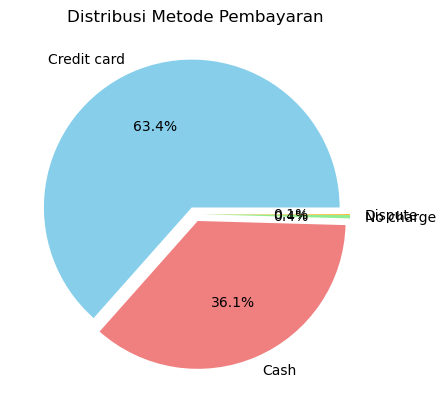

In [34]:
# Membuat pie chart dari hasil value_counts
value_counts = tlc['payment_type'].value_counts()
explode = [0.05] * len(value_counts)  # Setiap kategori mendapat efek explode yang sama
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightgray', 'lightyellow']  # Sesuaikan warna dengan jumlah kategori
plt.pie(value_counts, labels=value_counts.index, autopct='%.1f%%', explode=explode,colors=colors)
plt.title('Distribusi Metode Pembayaran')
plt.show()

Pie chart diatas menunjukkan bahwa jumlah metode pembayaran menggunakan kartu kredit jumlahnya hampir 2 kali lipat dibanding metode pembayaran cash dan jumlahnya lebih banyak dibanding metode pembayaran yang lain. 

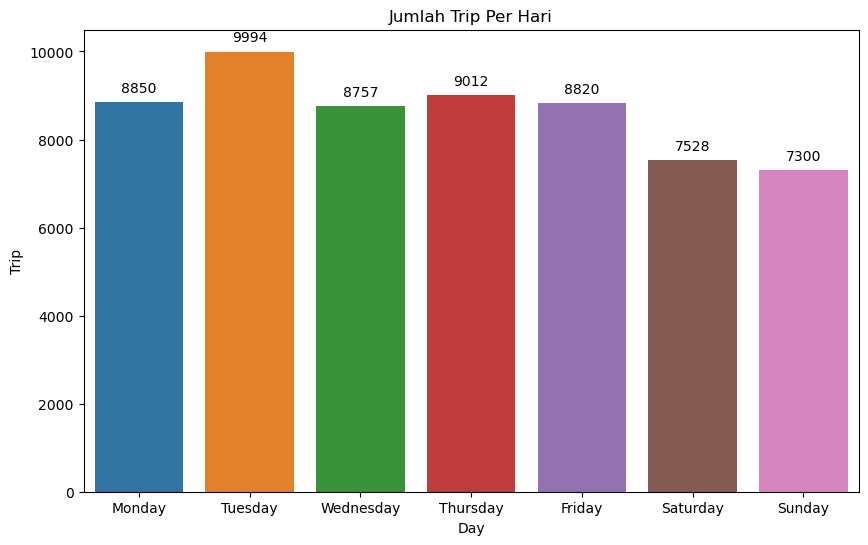

In [35]:
# 2. menganalisa hari paling banyak jumlah trip

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi kolom 'lpep_pickup_datetime' dan 'lpep_dropoff_datetime' ke tipe data datetime jika belum
tlc['lpep_pickup_datetime'] = pd.to_datetime(tlc['lpep_pickup_datetime'])
tlc['lpep_dropoff_datetime'] = pd.to_datetime(tlc['lpep_dropoff_datetime'])

# Membersihkan data dengan mengisi nilai kosong pada kolom 'lpep_dropoff_datetime'
tlc['lpep_dropoff_datetime'].fillna(tlc['lpep_pickup_datetime'], inplace=True)

# Membuat kolom baru dengan value hasil ekstrak dari kolom "lpep_pickup_datetime"
tlc['day_name'] = tlc['lpep_pickup_datetime'].dt.day_name()
tlc['day'] = tlc['lpep_pickup_datetime'].dt.day
tlc['hour'] = tlc['lpep_pickup_datetime'].dt.hour

# Membuat kolom "duration" dengan menghitung selisih waktu dalam menit
tlc['duration'] = (tlc['lpep_dropoff_datetime'] - tlc['lpep_pickup_datetime']).dt.total_seconds() // 60

# Menghitung jumlah transaksi per hari
day_count = tlc['day_name'].value_counts().reset_index(name='count')
day_count['day_name'] = pd.Categorical(day_count['day_name'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Membuat grafik jumlah transaksi per hari
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='day_name', y='count', data=day_count)
plt.title("Jumlah Trip Per Hari")
plt.xlabel("Day")
plt.ylabel("Trip")

# Menambahkan label pada setiap bar
for p in ax.patches:
    plt.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


Dari grafik di atas, menunjukan hari SELASA adalah hari paling banyak jumlah transaksinya sementara hari minggu hari yg paling sedikit jumlah transaksi.

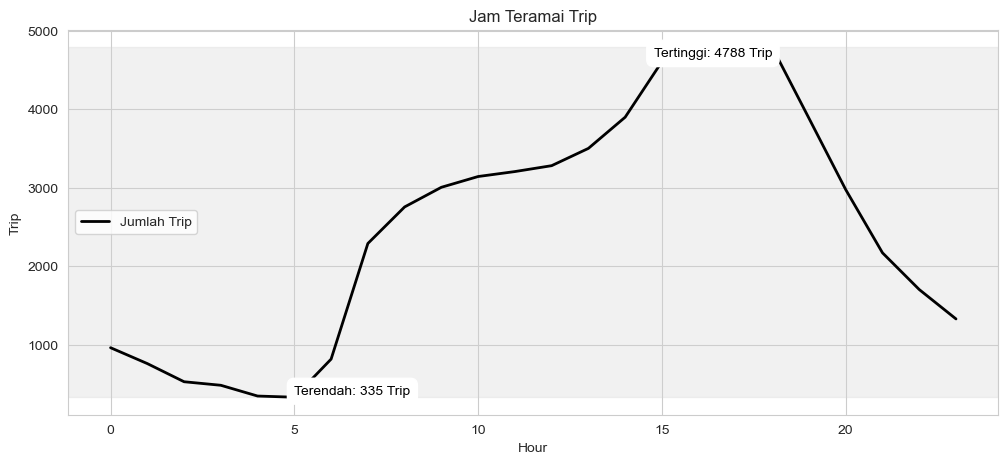

In [39]:
#3. menganalisa jam teramai pengguna taksi

# Membuat kolom baru dengan value hasil ekstrak dari kolom "lpep_pickup_datetime"
tlc['hour'] = tlc['lpep_pickup_datetime'].dt.hour

# Menghitung jumlah transaksi per jam
hour_count = tlc.groupby('hour')['hour'].count().reset_index(name='count')

# Membuat line plot jumlah trip per Jam dengan background yang berbeda
plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")
sns.lineplot(x='hour', y='count', data=hour_count, color='black', linewidth=2, label='Jumlah Trip', marker=None)

# Menambahkan background warna abu-abu
plt.axhspan(ymin=hour_count['count'].min(), ymax=hour_count['count'].max(), color='lightgray', alpha=0.3)

# Menambahkan label terendah dan tertinggi
plt.text(hour_count['hour'].iloc[hour_count['count'].idxmin()], hour_count['count'].min(), f'Terendah: {hour_count["count"].min()} Trip', ha='left', va='bottom', color='black', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))
plt.text(hour_count['hour'].iloc[hour_count['count'].idxmax()], hour_count['count'].max(), f'Tertinggi: {hour_count["count"].max()} Trip', ha='right', va='top', color='black', bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.5'))
plt.title("Jam Teramai Trip")
plt.xlabel("Hour")
plt.ylabel("Trip")
plt.legend()
plt.show()

Dari grafik diatas menunjukan pengguna taksi terbanyak ada di jam 15.00-18.00 dan terendah dari jam 00-05.00.

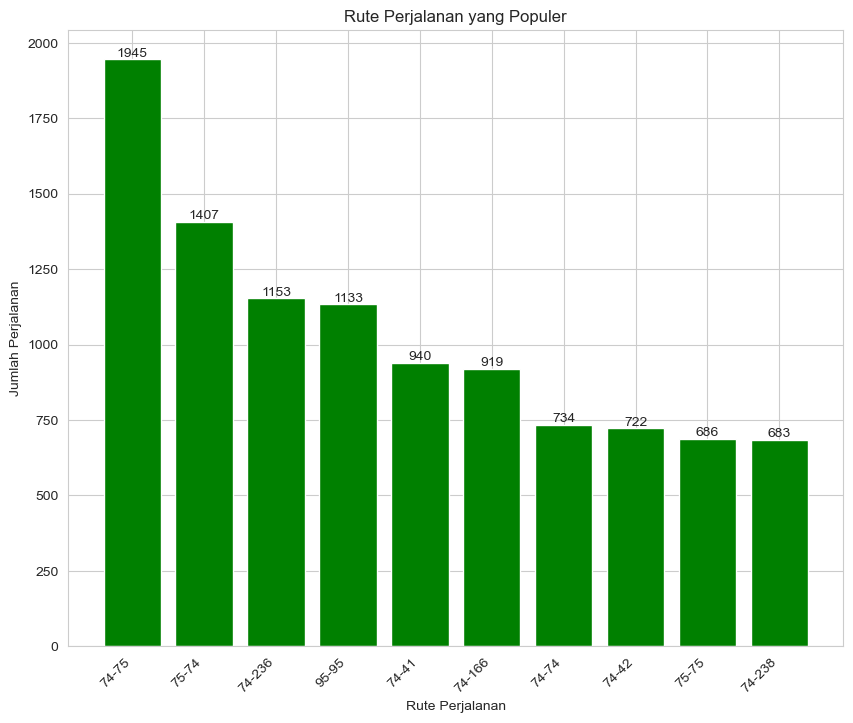

In [37]:
#4. menganalisa rute ter ramai 

# import pandas as pd
import matplotlib.pyplot as plt

# Menggabungkan ID lokasi ke dalam satu kolom 'route'
tlc['route'] = tlc['PULocationID'].astype(str) + '-' + tlc['DOLocationID'].astype(str)

# Menghitung jumlah perjalanan per rute
route_counts = tlc['route'].value_counts()

# Menampilkan 10 rute 
top_routes = route_counts.head(10)

# Membuat grafik batang vertikal 
plt.figure(figsize=(10, 8))
bars = plt.bar(top_routes.index, top_routes.values, color='green')

# Menambahkan label dan judul
plt.title('Rute Perjalanan yang Populer')
plt.xlabel('Rute Perjalanan')
plt.ylabel('Jumlah Perjalanan')

# Menambahkan label di setiap batang grafik
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

# Rotasi label pada sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45, ha='right')

# Menampilkan grafik
plt.show()


## Insights and Recommendations

Insights :

- Permintaan taksi di New York City masih tinggi, terutama pada hari kerja dan pada jam-jam sibuk.
- Metode pembayaran kartu kredit memiliki jumlah paling banyak dibandingkan metode pembayaran cash dan metode pembayaran lainnya. 
- Hari paling sibuk di data ini bukanlah hari senin,melainkan hari Selasa.Sementara itu,hari minggu paling sepi dibanding hari lain.
- Jumlah transaksi taksi cenderung rendah pada tengah malam hingga pagi awal (jam 0-5) dengan transaksi terendah pada jam 5 pagi. Jam-jam sibuk terjadi pada jam 8 pagi hingga puncaknya jam 3-6 sore. 
- Wilayah yang paling ramai terdapat pada rute 74-75. 

Recommendations:

- Perusahaan taksi dapat memanfaatkan hal ini dengan bermitra dengan perusahaan kartu kredit, dan membuat program promosi diskon di hari libur atau diinterval jam tertentu. Selain menambah profit, juga dapat meningkatkan layanan taksi kepada pelanggan.  
- Menambah armada taksi di rute-rute yang ramai pengguna taksi dan pada jam-jam sibuk. Hal ini untuk memastikan bahwa ketersediaan armada taksi dapat memenuhi permintaan penumpang.
- Menawarkan tarif yang lebih rendah pada malam hari untuk menarik lebih banyak penumpang.
- Menerapkan sistem pemesanan taksi yang dapat mendeteksi jam-jam sibuk. Hal ini untuk membantu penumpang mendapatkan taksi dengan harga yang lebih terjangkau.
- Untuk menarik penumpang dirute sepi, dapat ditambahkan layanan seperti menyediakan minuman dan cemilan gratis untuk penumpang.
- Melakukan promosi untuk menarik penumpang ke rute ramai.
